# Face Emotion Recognition Implementation

This day I continued what I have done yesterday

So, lastday I finisihed training the dataset using transfer learning - It tooks about 5-7 hours. 

After feeling fresh, I want to continue this works, here what we will use from yesterday

* The face_model2306.h5 -- [Resized Dataset](https://drive.google.com/file/u/5/d/13rjew4Ny56bNBJs0U707eJ6A05Xez0tr/view?usp=sharing)

* haarcascade_frontalface_default.xml ==> FYI, yesterday I forgot to explain this, this is come from the OpenCV repo, It can be very useful, to detect face -- [Original](https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml)

Okay let finish this job





## Importing the module

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
model = tf.keras.models.load_model('face_model_2306.h5')

In [3]:
model.evaluate

<bound method Model.evaluate of <tensorflow.python.keras.engine.functional.Functional object at 0x000001FA838ADB20>>

## Example Predictions

For make sure the model can be used

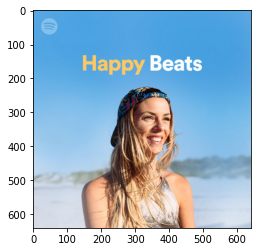

In [4]:
frame = cv2.imread('test/test3.jpg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [5]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [6]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print('Face not detected')
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]

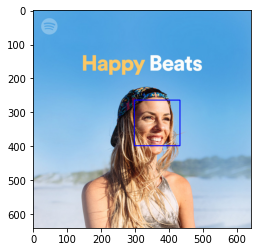

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

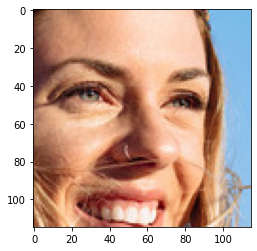

In [8]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [9]:
final_frame = cv2.resize(frame, (224, 224))
final_frame = np.expand_dims(final_frame, axis = 0)
final_frame = final_frame/255

In [10]:
predict_frame = model.predict(final_frame)

In [11]:
np.argmax(predict_frame)

0

## Video Predictions

In [27]:
import cv2
cascade = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangele_bgr = (255,255,0)
img = np.zeros((500,500))

text = 'Some text in a box!'

(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangele_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+cascade)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+2]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print('Face not detected')
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]

    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255

    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions) == 0):
        status = 'Angry'

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    
    elif (np.argmax(Predictions) == 1):
        status = 'Disgust'

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

        
    elif (np.argmax(Predictions) == 2):
        status = 'Fear'

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

        
    elif (np.argmax(Predictions) == 3):
        status = 'Happy'

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))


        
    elif (np.argmax(Predictions) == 4):
        status = 'Sad'

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))


        
    elif (np.argmax(Predictions) == 5):
        status = 'Surprise'

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255)) 
    else:
        status = 'Neutral'

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    cv2.imshow('Face Emotion Recognition Impelementation', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected


After trying several times, I just got value of 0, I believe my model yesterday is failed :'

I will not upload the model that build yesterday :v

**Oke fine let's move on**

I will follow along with new tutorial